In [1]:
import os
os.getcwd()

'C:\\Users\\wells'

ga:city: (not set)
ga:sessions: 71
ga:city: Dearborn
ga:sessions: 36
ga:city: Zhongli District
ga:sessions: 3
ga:city: East Lansing
ga:sessions: 1
ga:city: Taoyuan District
ga:sessions: 1


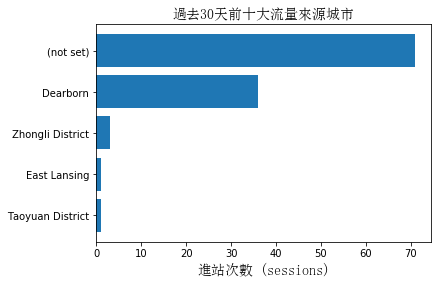

In [1]:
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import httplib2

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'My Project 93828-6d6dd0c427ee.json' #API金鑰
VIEW_ID = '190541410' #Google Analytics 資料檢視層ID




# Reporting API初始化與授權

def initialize_analyticsreporting():
 
  credentials = ServiceAccountCredentials.from_json_keyfile_name(
      KEY_FILE_LOCATION, SCOPES)

  # Build the service object.
  analytics = build('analyticsreporting', 'v4', credentials=credentials)

  return analytics


# 建立Google Analytics報表

def get_report(analytics):
  
  
  return analytics.reports().batchGet(
      body={
        'reportRequests': [
            {
                'viewId': VIEW_ID,
                'dateRanges': [{'startDate': '30daysAgo', 'endDate': 'today'}],
                'metrics': [{'expression': 'ga:sessions'}],
                'dimensions': [{"name": "ga:city"}],
                'orderBys': [{"fieldName": "ga:sessions", "sortOrder": "DESCENDING"}],
                'pageSize': 10
            }]
    }
  ).execute()


# 顯示Google Analytics報表

def print_response(response):
    
  cities = []
  val = []
  
  for report in response.get('reports', []): #將上述reports回應的內容取回並做為for迴圈基底
    columnHeader = report.get('columnHeader', {}) 
    dimensionHeaders = columnHeader.get('dimensions', [])
    metricHeaders = columnHeader.get('metricHeader', {}).get('metricHeaderEntries', [])

    for row in report.get('data', {}).get('rows', []):
      dimensions = row.get('dimensions', [])
      dateRangeValues = row.get('metrics', [])

      for header, dimension in zip(dimensionHeaders, dimensions):
        cities.append(dimension)
        print (header + ': ' + dimension)
        

      for i, values in enumerate(dateRangeValues):
        
        for metricHeader, value in zip(metricHeaders, values.get('values')):
          val.append(int(value))
          print (metricHeader.get('name') + ': ' + value)          
  
   #Matplot繪圖

    val.reverse()
    cities.reverse()
 
   #繪製水平柱狀圖
    
    plt.barh(np.arange(len(cities)), val, align='center', alpha=1.0) #依照城市個數來製作每一城市的來源流量柱條
    plt.yticks(np.arange(len(cities)), cities) #依照城市個數來製作Y軸城市名稱
 
   #安排圖形資訊
    font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14) #加入中文字型以避免亂碼
    plt.xlabel('進站次數 (sessions)', fontproperties=font) #繪製X軸標籤
    plt.title('過去30天前十大流量來源城市', fontproperties=font) #繪製圖形標題名稱
 
   #顯示圖形成果
    plt.show()


def main():
  
  analytics = initialize_analyticsreporting()
  response = get_report(analytics)
  print_response(response)

if __name__ == '__main__':
  main()